In [2]:
import pandas as pd
import dataframe_image as dfi
import numpy as np
import random as rd
import math
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings


from sklearn.model_selection  import train_test_split
from sklearn.preprocessing    import LabelEncoder
from sklearn.preprocessing    import OneHotEncoder

from sklearn.linear_model     import LogisticRegression
from sklearn.tree             import DecisionTreeClassifier
from sklearn.ensemble         import RandomForestClassifier
from sklearn.neural_network   import MLPClassifier


from sklearn.metrics          import confusion_matrix
from sklearn.metrics          import f1_score
from sklearn.metrics          import roc_auc_score
from sklearn.metrics          import roc_curve
from sklearn.metrics          import auc
from sklearn.metrics          import make_scorer

from sklearn.model_selection  import GridSearchCV

from imblearn.over_sampling   import SMOTE

Leemos el excel con los datos de las notas en el examen previo a la universidad, las cuales utilizaremos como variables para predecir. Estudiamos un poco el dataset, con sus columnas, valores, valores repetidos...

In [3]:
df_alumno_exito = pd.read_excel("./df_alumno_exito.xlsx",header =0)

In [4]:
df_alumno_exito

,Unnamed: 0,PROGRAMA,INGLÉS,FÍSICA,QUÍMICA,BIOLOGÍA,FILOSOFÍA,CIENCIAS SOCIALES,MATEMÁTICAS,LENGUAJE,PUNTAJE GLOBAL,CIENCIAS NATURALES,SOCIALES Y CIUDADANAS,LECTURA CRÍTICA,HISTORIA,GEOGRAFÍA,RAZONAMIENTO CUANTITATIVO,COMPETENCIAS CIUDADANAS,NOTA_UNI
0,0,Ingeniería Mecatrónica,57,66,59,61,41,53,74,58,NP,NP,NP,NP,NP,NP,NP,NP,1
1,1,Derecho,51,NP,NP,NP,NP,NP,39,NP,241,51,44,58,NP,NP,NP,NP,1
2,2,Contaduría Pública,76,NP,NP,NP,NP,NP,65,NP,330,68,64,64,NP,NP,NP,NP,1
3,4,Ingeniería Mecatrónica,67,NP,NP,NP,NP,NP,53,NP,311,63,66,65,NP,NP,NP,NP,1
4,7,Nutrición y Dietética,53,NP,NP,NP,NP,NP,53,NP,271,56,52,56,NP,NP,NP,NP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3857,5511,Licenciatura en Educación Básica Primaria,38,NP,NP,NP,NP,NP,34,NP,193,37,36,48,NP,NP,NP,NP,1
3858,5512,Licenciatura en Educación Básica Primaria,29,36,45,46,39,NP,42,47,NP,NP,NP,NP,39,42,NP,NP,1
3859,5513,Enfermería,59,NP,NP,NP,NP,NP,65,NP,338,75,59,74,NP,NP,NP,NP,1
3860,5514,Licenciatura en Educación Básica Primaria,52.08,60.57,59.52,44.42,53.93,58.08,63.02,56.41,NP,NP,NP,NP,NP,NP,NP,NP,1


In [5]:
df_alumno_exito = df_alumno_exito.drop('Unnamed: 0',axis=1)

In [6]:
lista_conteo = []
for i in df_alumno_exito['NOTA_UNI']:
    lista_conteo.append(i)
    
print("En el dataset contamos con {} elementos de buena decisión en la carrera y con {} de mala decisión".format(lista_conteo.count(1),lista_conteo.count(0)))

En el dataset contamos con 3309 elementos de buena decisión en la carrera y con 553 de mala decisión


Se observa que tenemos pocos elementos en el dataset. Además está descompensado, contamos con más elementos positivos que negativos.

# Transformaciones

#### Missing values

Estudiamos las variables, vemos cuantos valores no nulos tienen.

In [7]:
df_alumno_exito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3862 entries, 0 to 3861
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   PROGRAMA                   3862 non-null   object
 1   INGLÉS                     3827 non-null   object
 2   FÍSICA                     3862 non-null   object
 3   QUÍMICA                    3862 non-null   object
 4   BIOLOGÍA                   3862 non-null   object
 5   FILOSOFÍA                  3862 non-null   object
 6   CIENCIAS SOCIALES          3862 non-null   object
 7   MATEMÁTICAS                3836 non-null   object
 8   LENGUAJE                   3862 non-null   object
 9   PUNTAJE GLOBAL             3835 non-null   object
 10  CIENCIAS NATURALES         3835 non-null   object
 11  SOCIALES Y CIUDADANAS      3835 non-null   object
 12  LECTURA CRÍTICA            3836 non-null   object
 13  HISTORIA                   3862 non-null   object
 14  GEOGRAFÍ

Vemos que algunas columnas asociadas a asignaturas tienen un porcentaje muy bajo de valores nulos. Se entiende que esto se debe a que el alumnos estaría inscrito a la prueab pero no debió presentarse, por lo que se usará la etiqueta "NP" para rellenarlos.

In [8]:
df_alumno_exito.fillna('NP',inplace = True)

In [9]:
df_alumno_exito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3862 entries, 0 to 3861
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   PROGRAMA                   3862 non-null   object
 1   INGLÉS                     3862 non-null   object
 2   FÍSICA                     3862 non-null   object
 3   QUÍMICA                    3862 non-null   object
 4   BIOLOGÍA                   3862 non-null   object
 5   FILOSOFÍA                  3862 non-null   object
 6   CIENCIAS SOCIALES          3862 non-null   object
 7   MATEMÁTICAS                3862 non-null   object
 8   LENGUAJE                   3862 non-null   object
 9   PUNTAJE GLOBAL             3862 non-null   object
 10  CIENCIAS NATURALES         3862 non-null   object
 11  SOCIALES Y CIUDADANAS      3862 non-null   object
 12  LECTURA CRÍTICA            3862 non-null   object
 13  HISTORIA                   3862 non-null   object
 14  GEOGRAFÍ

In [10]:
df_alumno_exito.columns

Index(['PROGRAMA', 'INGLÉS', 'FÍSICA', 'QUÍMICA', 'BIOLOGÍA', 'FILOSOFÍA',
       'CIENCIAS SOCIALES', 'MATEMÁTICAS', 'LENGUAJE', 'PUNTAJE GLOBAL',
       'CIENCIAS NATURALES', 'SOCIALES Y CIUDADANAS', 'LECTURA CRÍTICA',
       'HISTORIA', 'GEOGRAFÍA', 'RAZONAMIENTO CUANTITATIVO',
       'COMPETENCIAS CIUDADANAS', 'NOTA_UNI'],
      dtype='object')

array([[<AxesSubplot:title={'center':'PROGRAMA'}>,
        <AxesSubplot:title={'center':'FÍSICA'}>,
        <AxesSubplot:title={'center':'QUÍMICA'}>,
        <AxesSubplot:title={'center':'BIOLOGÍA'}>],
       [<AxesSubplot:title={'center':'FILOSOFÍA'}>,
        <AxesSubplot:title={'center':'CIENCIAS SOCIALES'}>,
        <AxesSubplot:title={'center':'MATEMÁTICAS'}>,
        <AxesSubplot:title={'center':'LENGUAJE'}>],
       [<AxesSubplot:title={'center':'PUNTAJE GLOBAL'}>,
        <AxesSubplot:title={'center':'CIENCIAS NATURALES'}>,
        <AxesSubplot:title={'center':'SOCIALES Y CIUDADANAS'}>,
        <AxesSubplot:title={'center':'LECTURA CRÍTICA'}>],
       [<AxesSubplot:title={'center':'HISTORIA'}>,
        <AxesSubplot:title={'center':'GEOGRAFÍA'}>,
        <AxesSubplot:title={'center':'RAZONAMIENTO CUANTITATIVO'}>,
        <AxesSubplot:title={'center':'COMPETENCIAS CIUDADANAS'}>],
       [<AxesSubplot:title={'center':'NOTA_UNI'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubpl

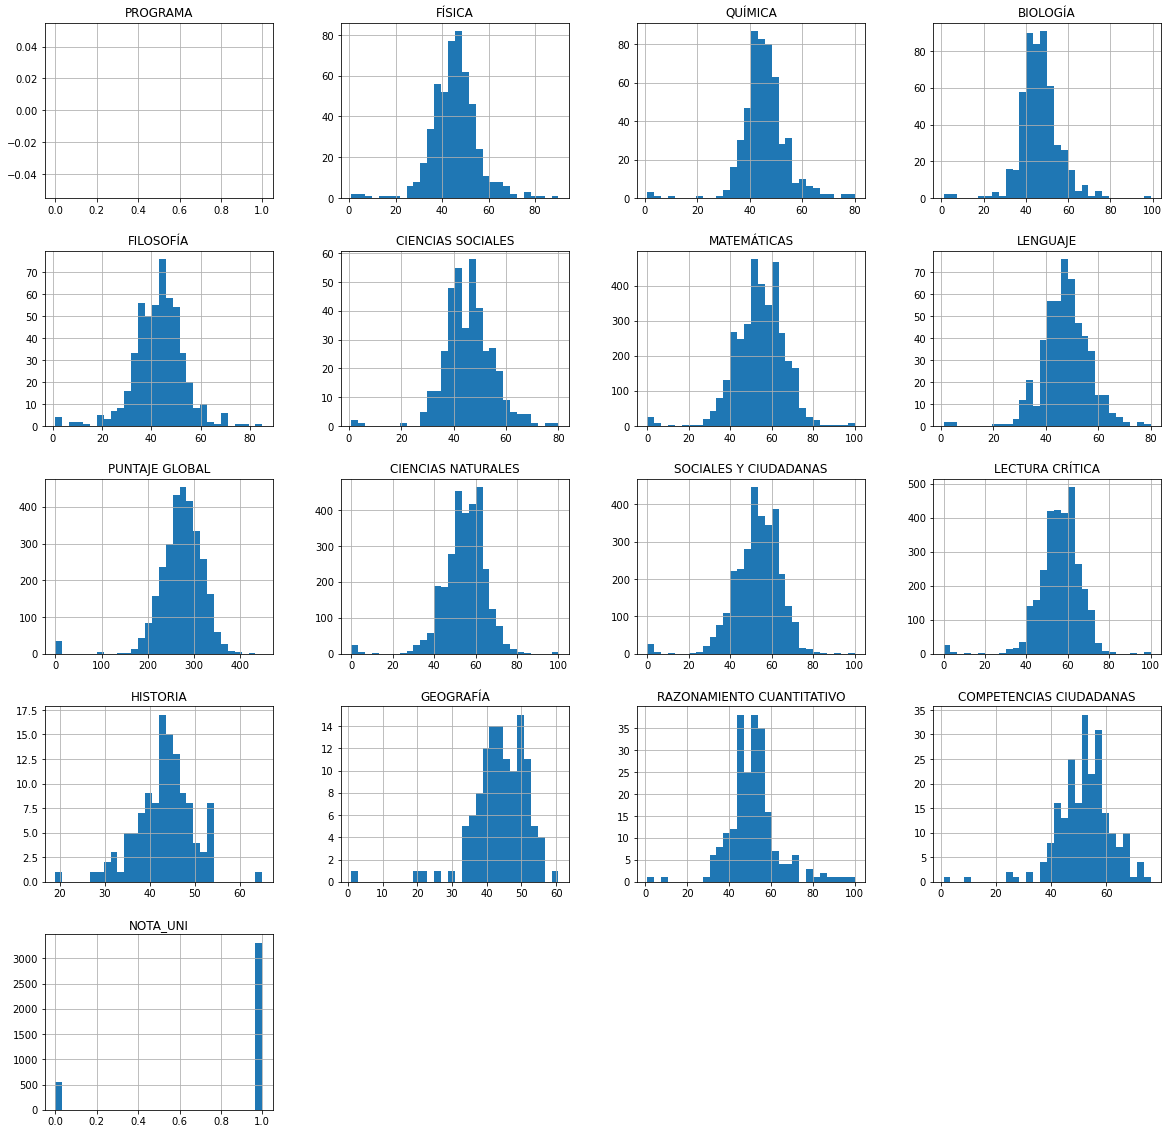

In [11]:
areas2 = np.delete(df_alumno_exito.columns,[1])

df_alumno_exito_plot = df_alumno_exito.copy()
for area in areas2:
    df_alumno_exito_plot[area] = pd.to_numeric(df_alumno_exito_plot[area], errors='coerce')

df_alumno_exito_plot.hist(bins=30,figsize=(20,20))

A continuación, dividiré las notas en distintas categorias. 

Primero sustituyo la etiqueta NP por un numero exagerado (-500) para que la columna sea numérica y pueda hacer comparaciones como < o >.

In [14]:
programas = list(df_alumno_exito.columns)
programas.remove('PROGRAMA')
programas.remove('NOTA_UNI')

In [15]:
programas

['INGLÉS',
 'FÍSICA',
 'QUÍMICA',
 'BIOLOGÍA',
 'FILOSOFÍA',
 'CIENCIAS SOCIALES',
 'MATEMÁTICAS',
 'LENGUAJE',
 'PUNTAJE GLOBAL',
 'CIENCIAS NATURALES',
 'SOCIALES Y CIUDADANAS',
 'LECTURA CRÍTICA',
 'HISTORIA',
 'GEOGRAFÍA',
 'RAZONAMIENTO CUANTITATIVO',
 'COMPETENCIAS CIUDADANAS']

In [16]:
df_alumno_exito_reset= df_alumno_exito.reset_index()
df_alumno_exito = df_alumno_exito_reset.drop('index',axis=1)

In [17]:
df_alumno_exito.replace({'NP':-500},inplace=True)

for programa in programas:
    df_alumno_exito[programa] = pd.to_numeric(df_alumno_exito[programa], errors='coerce')
    #for i in range(len(df_alumno_exito[programa])):
        #if df_alumno_exito.loc[df_alumno_exito['PROGRAMA'] == 'Ingeniería de Procesos','INGLÉS']


Luego crea una funcion para hacer un map a partir de una de las columnas, el cual creará una segunda columna con las etiquetas que será con la que nos quedaremos.

In [18]:
def etiquetar_notas (row,programa):
    if row[programa] == -500 :
        return 'NP'
    if 0 <= row[programa] < 40 :
        return 'Suspenso'
    if 40 <= row[programa] < 50 :
        return 'Aprobado'
    if 50 <= row[programa] < 60 :
        return 'Bien'
    if 60 <= row[programa] < 80 :
        return 'Notable'
    if 80 <= row[programa]:
        return 'Excelente'
    return 'NP'

In [19]:
for programa in programas:
    df_alumno_exito[programa+'2'] = df_alumno_exito.apply (lambda row: etiquetar_notas(row,programa), axis=1)

In [20]:
df_alumno_exito

,PROGRAMA,INGLÉS,FÍSICA,QUÍMICA,BIOLOGÍA,FILOSOFÍA,CIENCIAS SOCIALES,MATEMÁTICAS,LENGUAJE,PUNTAJE GLOBAL,...,MATEMÁTICAS2,LENGUAJE2,PUNTAJE GLOBAL2,CIENCIAS NATURALES2,SOCIALES Y CIUDADANAS2,LECTURA CRÍTICA2,HISTORIA2,GEOGRAFÍA2,RAZONAMIENTO CUANTITATIVO2,COMPETENCIAS CIUDADANAS2
0,Ingeniería Mecatrónica,57.00,66.00,59.00,61.00,41.00,53.00,74.00,58.00,-500,...,Notable,Bien,NP,NP,NP,NP,NP,NP,NP,NP
1,Derecho,51.00,-500.00,-500.00,-500.00,-500.00,-500.00,39.00,-500.00,241,...,Suspenso,NP,Excelente,Bien,Aprobado,Bien,NP,NP,NP,NP
2,Contaduría Pública,76.00,-500.00,-500.00,-500.00,-500.00,-500.00,65.00,-500.00,330,...,Notable,NP,Excelente,Notable,Notable,Notable,NP,NP,NP,NP
3,Ingeniería Mecatrónica,67.00,-500.00,-500.00,-500.00,-500.00,-500.00,53.00,-500.00,311,...,Bien,NP,Excelente,Notable,Notable,Notable,NP,NP,NP,NP
4,Nutrición y Dietética,53.00,-500.00,-500.00,-500.00,-500.00,-500.00,53.00,-500.00,271,...,Bien,NP,Excelente,Bien,Bien,Bien,NP,NP,NP,NP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3857,Licenciatura en Educación Básica Primaria,38.00,-500.00,-500.00,-500.00,-500.00,-500.00,34.00,-500.00,193,...,Suspenso,NP,Excelente,Suspenso,Suspenso,Aprobado,NP,NP,NP,NP
3858,Licenciatura en Educación Básica Primaria,29.00,36.00,45.00,46.00,39.00,-500.00,42.00,47.00,-500,...,Aprobado,Aprobado,NP,NP,NP,NP,Suspenso,Aprobado,NP,NP
3859,Enfermería,59.00,-500.00,-500.00,-500.00,-500.00,-500.00,65.00,-500.00,338,...,Notable,NP,Excelente,Notable,Bien,Notable,NP,NP,NP,NP
3860,Licenciatura en Educación Básica Primaria,52.08,60.57,59.52,44.42,53.93,58.08,63.02,56.41,-500,...,Notable,Bien,NP,NP,NP,NP,NP,NP,NP,NP


Eliminamos las columnas numéricas y nombramos con los nombres que teníamos antes a las nuevas.

In [21]:
df_alumno_exito = df_alumno_exito.drop(programas,axis=1)

In [22]:
dicc_programas = {}
for programa in programas:
    dicc_programas[programa+'2'] = programa
    
df_alumno_exito.rename(columns = dicc_programas,inplace = True)

In [23]:
print("Valores únicos de los distintos programas")
for programa in programas:
    print("{}:\n    {}".format(programa,df_alumno_exito[programa].unique()))

Valores únicos de los distintos programas
INGLÉS:
    ['Bien' 'Notable' 'Aprobado' 'NP' 'Suspenso' 'Excelente']
FÍSICA:
    ['Notable' 'NP' 'Bien' 'Aprobado' 'Suspenso' 'Excelente']
QUÍMICA:
    ['Bien' 'NP' 'Aprobado' 'Suspenso' 'Notable' 'Excelente']
BIOLOGÍA:
    ['Notable' 'NP' 'Aprobado' 'Suspenso' 'Bien' 'Excelente']
FILOSOFÍA:
    ['Aprobado' 'NP' 'Suspenso' 'Bien' 'Notable' 'Excelente']
CIENCIAS SOCIALES:
    ['Bien' 'NP' 'Suspenso' 'Aprobado' 'Notable' 'Excelente']
MATEMÁTICAS:
    ['Notable' 'Suspenso' 'Bien' 'Aprobado' 'NP' 'Excelente']
LENGUAJE:
    ['Bien' 'NP' 'Aprobado' 'Suspenso' 'Notable' 'Excelente']
PUNTAJE GLOBAL:
    ['NP' 'Excelente' 'Suspenso' 'Aprobado' 'Notable']
CIENCIAS NATURALES:
    ['NP' 'Bien' 'Notable' 'Aprobado' 'Suspenso' 'Excelente']
SOCIALES Y CIUDADANAS:
    ['NP' 'Aprobado' 'Notable' 'Bien' 'Suspenso' 'Excelente']
LECTURA CRÍTICA:
    ['NP' 'Bien' 'Notable' 'Aprobado' 'Suspenso' 'Excelente']
HISTORIA:
    ['NP' 'Aprobado' 'Suspenso' 'Bien' 'Notable

<AxesSubplot:>

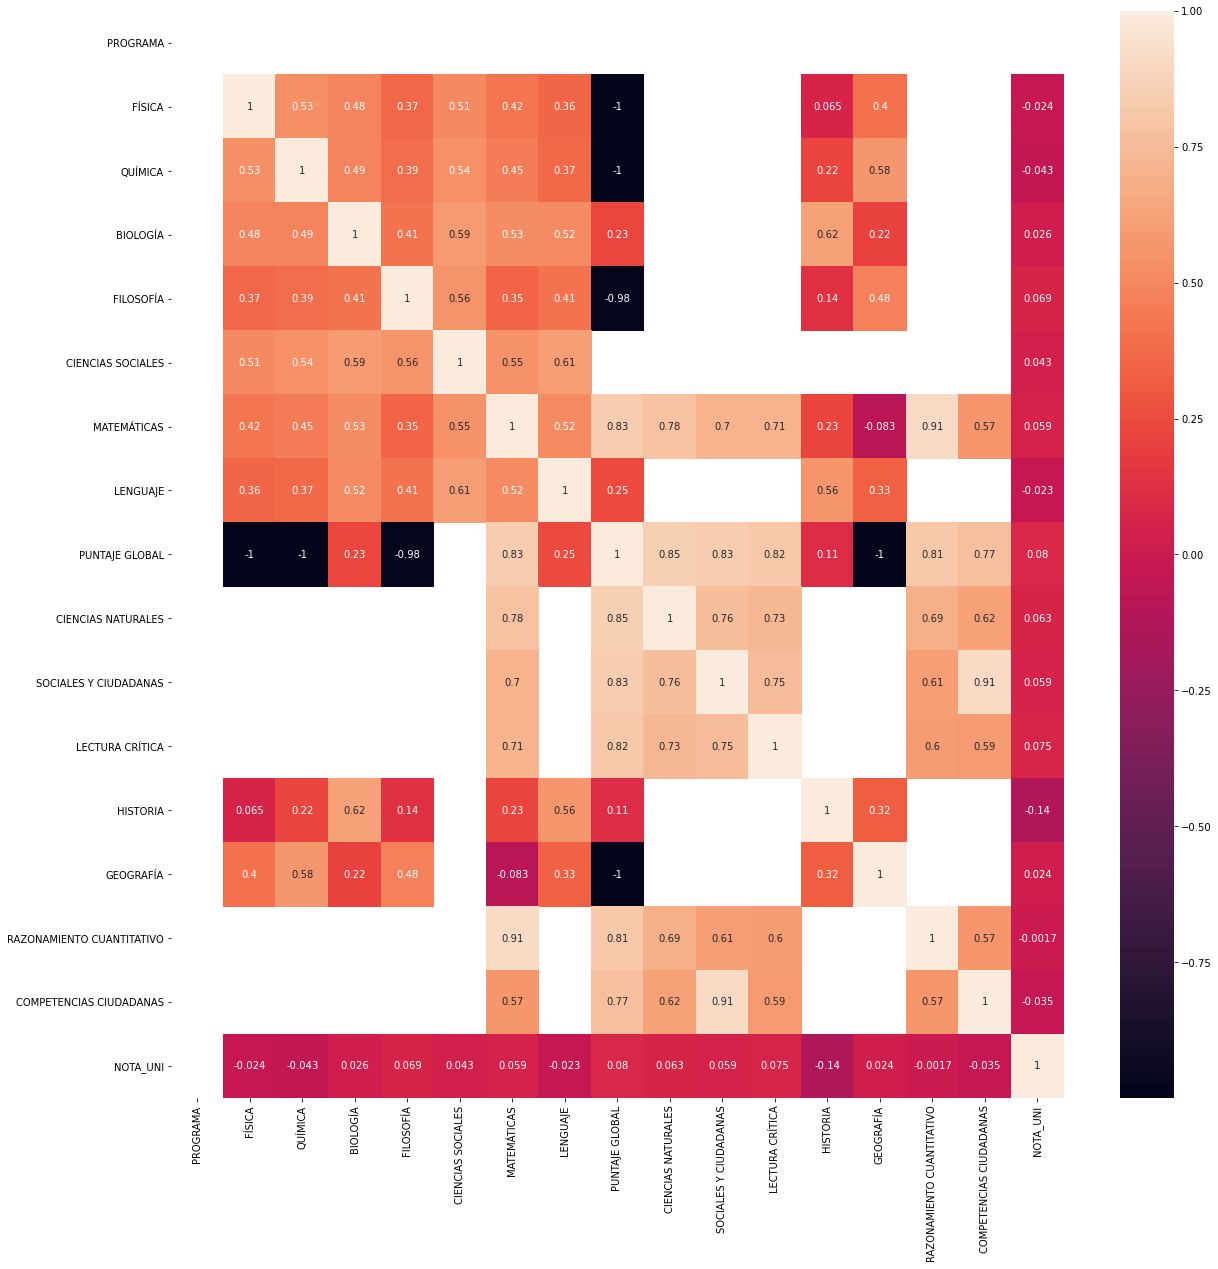

In [24]:
correlation = df_alumno_exito_plot.corr()
f, ax = plt.subplots(figsize = [20,20])
sns.heatmap(correlation,annot=True)

Suponemos que puntaje global es la suma de los demás valores (o una fórmula similar), por lo que podemos eliminarla ya que no nos aporta ninguna información nueva.

In [25]:
df_alumno_exito = df_alumno_exito.drop('PUNTAJE GLOBAL',axis=1)

In [26]:
df_alumno_exito

,PROGRAMA,NOTA_UNI,INGLÉS,FÍSICA,QUÍMICA,BIOLOGÍA,FILOSOFÍA,CIENCIAS SOCIALES,MATEMÁTICAS,LENGUAJE,CIENCIAS NATURALES,SOCIALES Y CIUDADANAS,LECTURA CRÍTICA,HISTORIA,GEOGRAFÍA,RAZONAMIENTO CUANTITATIVO,COMPETENCIAS CIUDADANAS
0,Ingeniería Mecatrónica,1,Bien,Notable,Bien,Notable,Aprobado,Bien,Notable,Bien,NP,NP,NP,NP,NP,NP,NP
1,Derecho,1,Bien,NP,NP,NP,NP,NP,Suspenso,NP,Bien,Aprobado,Bien,NP,NP,NP,NP
2,Contaduría Pública,1,Notable,NP,NP,NP,NP,NP,Notable,NP,Notable,Notable,Notable,NP,NP,NP,NP
3,Ingeniería Mecatrónica,1,Notable,NP,NP,NP,NP,NP,Bien,NP,Notable,Notable,Notable,NP,NP,NP,NP
4,Nutrición y Dietética,1,Bien,NP,NP,NP,NP,NP,Bien,NP,Bien,Bien,Bien,NP,NP,NP,NP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3857,Licenciatura en Educación Básica Primaria,1,Suspenso,NP,NP,NP,NP,NP,Suspenso,NP,Suspenso,Suspenso,Aprobado,NP,NP,NP,NP
3858,Licenciatura en Educación Básica Primaria,1,Suspenso,Suspenso,Aprobado,Aprobado,Suspenso,NP,Aprobado,Aprobado,NP,NP,NP,Suspenso,Aprobado,NP,NP
3859,Enfermería,1,Bien,NP,NP,NP,NP,NP,Notable,NP,Notable,Bien,Notable,NP,NP,NP,NP
3860,Licenciatura en Educación Básica Primaria,1,Bien,Notable,Bien,Aprobado,Bien,Bien,Notable,Bien,NP,NP,NP,NP,NP,NP,NP


In [27]:
df_alumno0 = df_alumno_exito[df_alumno_exito['NOTA_UNI'] == 0]
df_alumno1 = df_alumno_exito[df_alumno_exito['NOTA_UNI'] == 1]

In [28]:
print(len(df_alumno_exito))
print(len(df_alumno0))
print(len(df_alumno1))

3862
553
3309


In [30]:
y = df_alumno1['PROGRAMA']

# Esparta

Probemos ahora con el algoritmo más simple Esparta. Para este algoritmo solo queremos los alumnos a los que se considera que le fue bien la carrera (los que tienen un 1 en la columna NOTA_UNI)

In [32]:
def plot_matriz(y_test,yhat):
    cm = confusion_matrix(y_test,yhat)
    sns.set(font_scale=1)
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
    plt.title("Matriz de confusión")
    plt.xlabel("Valores predichos")
    plt.ylabel("Valores reales")
    plt.show
    
#plot_matriz(y_test_sec,yhat)

In [33]:
esparta_df = df_alumno1.copy()
esparta_df['PROGRAMA'] = y

Ya no necesitamos la nota de la carrera

In [34]:
esparta_df.drop(['FÍSICA','BIOLOGÍA','QUÍMICA','FILOSOFÍA','LENGUAJE','SOCIALES Y CIUDADANAS','HISTORIA','GEOGRAFÍA','RAZONAMIENTO CUANTITATIVO','COMPETENCIAS CIUDADANAS'],axis=1,inplace=True)

In [35]:
df_esparta_final = esparta_df.head(1)
dfi.export(df_esparta_final, 'df_esparta_final.png')

In [36]:
esparta_df.drop('NOTA_UNI',axis=1,inplace=True)

In [37]:
esparta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3309 entries, 0 to 3861
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PROGRAMA            3309 non-null   object
 1   INGLÉS              3309 non-null   object
 2   CIENCIAS SOCIALES   3309 non-null   object
 3   MATEMÁTICAS         3309 non-null   object
 4   CIENCIAS NATURALES  3309 non-null   object
 5   LECTURA CRÍTICA     3309 non-null   object
dtypes: object(6)
memory usage: 181.0+ KB


Tenemos que codificar la columna programa, pues ahora es nuestra variable objetivo

<AxesSubplot:title={'center':'Count (target)'}>

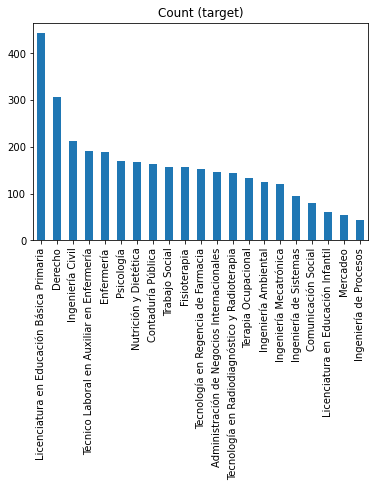

In [38]:
esparta_df['PROGRAMA'].value_counts().plot(kind='bar', title='Count (target)')

In [39]:
le = LabelEncoder()
esparta_df['PROGRAMA'] = le.fit_transform(esparta_df['PROGRAMA'])

In [40]:
y_esparta = esparta_df['PROGRAMA']

<AxesSubplot:title={'center':'Count (target)'}>

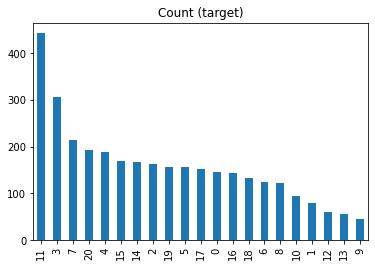

In [41]:
y_esparta.value_counts().plot(kind='bar', title='Count (target)')

In [42]:
esparta_df.drop('PROGRAMA',axis=1,inplace=True)

In [43]:
# check version number
import imblearn
print(imblearn.__version__)

0.7.0


Hacemos la partición correspondiente

In [44]:
X_train_esparta, X_test_esparta, y_train_esparta, y_test_esparta = train_test_split(esparta_df, y_esparta, test_size=0.2, random_state=40)

In [45]:
X_train_esparta

,INGLÉS,CIENCIAS SOCIALES,MATEMÁTICAS,CIENCIAS NATURALES,LECTURA CRÍTICA
3645,Bien,NP,Notable,Bien,Notable
427,NP,NP,NP,NP,NP
755,Aprobado,NP,Notable,Bien,Notable
159,Suspenso,NP,Aprobado,Aprobado,Suspenso
551,Aprobado,NP,Aprobado,Aprobado,Aprobado
...,...,...,...,...,...
1549,Bien,NP,Bien,Bien,Bien
3562,Suspenso,NP,Suspenso,Suspenso,Bien
2571,Bien,NP,Bien,Aprobado,Bien
2389,NP,NP,NP,NP,NP


Codificamos las variables independientes

<AxesSubplot:title={'center':'Count (Programa)'}>

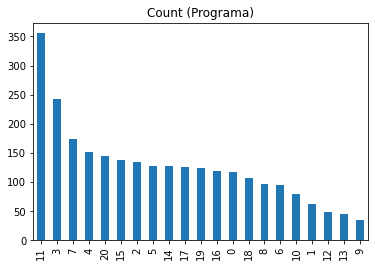

In [46]:
y_train_esparta.value_counts().plot(kind='bar', title='Count (Programa)')

In [49]:
columns = X_train_esparta.columns
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_cols = encoder.fit_transform(X_train_esparta[columns]).toarray()
X_train_esparta_transf = pd.DataFrame(encoded_cols)
    
encoded_cols_test = encoder.transform(X_test_esparta[columns]).toarray()
X_test_esparta_transf = pd.DataFrame(encoded_cols_test)

filename = 'Esparta_encoder.sav'
joblib.dump(encoder, filename)

['Esparta_encoder.sav']

In [50]:
X_test_esparta_transf

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
658,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
659,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
660,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:title={'center':'Count (Programa)'}>

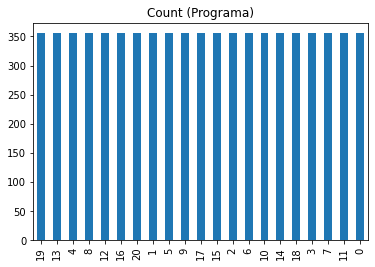

In [51]:
oversample = SMOTE()
X_train_final, y_final = oversample.fit_resample(X_train_esparta_transf, y_train_esparta)

y_final.value_counts().plot(kind='bar', title='Count (Programa)')

<AxesSubplot:title={'center':'Count (Programa)'}>

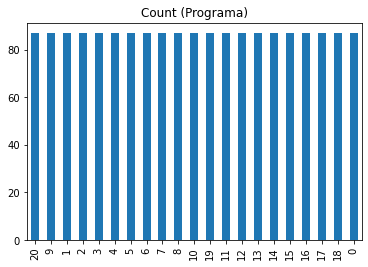

In [52]:
oversample = SMOTE()
X_test_final, y_test_final = oversample.fit_resample(X_test_esparta_transf, y_test_esparta)

y_test_final.value_counts().plot(kind='bar', title='Count (Programa)')

Pasamos a escoger ahora el mejor modelo posible

In [53]:
max_depth_list    = np.array([5,10,15,20,25,30,35,40,45])

param_grid  = dict(max_depth = max_depth_list)
modelo_grid = DecisionTreeClassifier(random_state=1)

warnings.filterwarnings("ignore")

scorer = make_scorer(f1_score, average = 'weighted')

grid = GridSearchCV(estimator=modelo_grid,param_grid=param_grid,scoring=scorer,cv=5)

#grid = GridSearchCV(estimator=modelo_grid, param_grid = param_grid,scoring=make_scorer(f1_score(average=None)))
grid.fit(X_train_final,y_final)

print(f'Mejor puntuación: {grid.best_score_} para los estimadores max_depth, criterion, splitter: {grid.best_estimator_.max_depth} ')

Mejor puntuación: 0.2612226594214005 para los estimadores max_depth, criterion, splitter: 40 


1827
1827
AUC score: 62.776


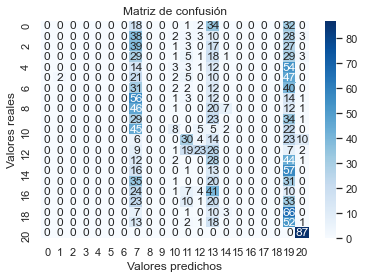

In [54]:
modelo = DecisionTreeClassifier(random_state=1,max_depth=5)
modelo.fit(X_train_final,y_final)

yhat = modelo.predict(X_test_final)
pred_prob = modelo.predict_proba(X_test_final)

print(len(yhat))
print(len(y_test_final))
accuracy = roc_auc_score(y_test_final,pred_prob,multi_class="ovr")

print('AUC score: {:.3f}'.format(accuracy*100))

plot_matriz(y_test_final,yhat)

In [55]:
max_depth_list = np.array([5,10,15])
n_estimators_list = np.array([50,100,150,200])

param_grid  = dict(n_estimators = n_estimators_list,max_depth = max_depth_list)
modelo_grid = RandomForestClassifier(random_state=1)

warnings.filterwarnings("ignore")

scorer = make_scorer(f1_score, average = 'weighted')

grid = GridSearchCV(estimator=modelo_grid,param_grid=param_grid,scoring=scorer,cv=5)

#grid = GridSearchCV(estimator=modelo_grid, param_grid = param_grid,scoring=make_scorer(f1_score(average=None)))
grid.fit(X_train_esparta_transf,y_train_esparta)

print(f'Mejor puntuación: {grid.best_score_} para los estimadores n_estimatos, max_depth: {grid.best_estimator_.n_estimators},{grid.best_estimator_.max_depth} ')

Mejor puntuación: 0.15328543045178628 para los estimadores n_estimatos, max_depth: 150,15 


1827
1827
AUC score: 66.317


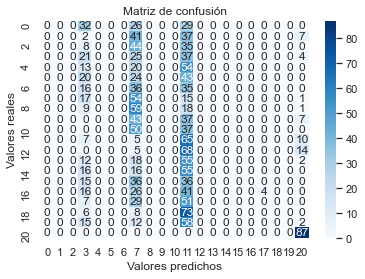

In [57]:
modelo = RandomForestClassifier(random_state=1,max_depth = 4,n_estimators=600)
modelo.fit(X_train_esparta_transf,y_train_esparta)

yhat = modelo.predict(X_test_final)
pred_prob = modelo.predict_proba(X_test_final)

print(len(yhat))
print(len(y_test_final))
accuracy = roc_auc_score(y_test_final,pred_prob,multi_class="ovr")

print('AUC score: {:.3f}'.format(accuracy*100))

plot_matriz(y_test_final,yhat)

In [179]:
warnings.filterwarnings("ignore")

activation_list = np.array(['identity','logistic','tanh','relu'])
solver_list = np.array(["lbfgs","sgd","adam"])
learning_rate_init_list  = np.array([0.005,0.01,0.05,0.1])

param_grid  = dict(activation = activation_list,solver=solver_list,learning_rate_init=learning_rate_init_list)
modelo_grid = MLPClassifier(random_state=1)

scorer = make_scorer(f1_score, average = 'weighted')

grid = GridSearchCV(estimator=modelo_grid,param_grid=param_grid,scoring=scorer,cv=5)

#grid = GridSearchCV(estimator=modelo_grid, param_grid = param_grid,scoring=make_scorer(f1_score(average=None)))
grid.fit(X_train_esparta_transf,y_train_esparta)

print(f'Mejor puntuación: {grid.best_score_} para los estimadores max_depth, criterion, splitter: {grid.best_estimator_.activation},{grid.best_estimator_.solver},{grid.best_estimator_.learning_rate_init} ')

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

KeyboardInterrupt: 

1827
1827
AUC score: 66.730


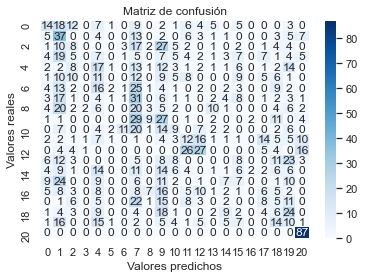

In [146]:
modelo = MLPClassifier(random_state=1,activation = 'identity',solver='sgd',learning_rate_init=0.01,hidden_layer_sizes=(50,7),max_iter=2000)
modelo.fit(X_train_final,y_final)

yhat = modelo.predict(X_test_final)
pred_prob = modelo.predict_proba(X_test_final)

print(len(yhat))
print(len(y_test_final))
accuracy = roc_auc_score(y_test_final,pred_prob,multi_class="ovr")

print('AUC score: {:.3f}'.format(accuracy*100))

plot_matriz(y_test_final,yhat)

In [140]:
filename = 'Esparta2.sav'
joblib.dump(modelo, filename)

['Esparta.sav']

Probamos ha mezclar los tres algoritmos

In [59]:
models = [
    LogisticRegression(random_state=1),
    DecisionTreeClassifier(random_state=1,max_depth=5),
    MLPClassifier(random_state=1,activation = 'identity',solver='sgd',learning_rate_init=0.01,hidden_layer_sizes=(50,7),max_iter=1000)
    
]


probas= np.zeros(len(X_test_esparta_transf))
for i, m in enumerate(models):
    m.fit(X_train_final, y_final),
    proba = m.predict_proba(X_test_esparta_transf)
    zip_probas = zip(probas,proba)
    probas = [x + y for (x, y) in zip_probas]

probas

[array([0.19498342, 0.11272466, 0.16658903, 0.13411759, 0.16332285,
        0.23445301, 0.19524922, 0.22569981, 0.23078442, 0.35762165,
        0.20273393, 0.0554597 , 0.01447787, 0.05927227, 0.1696354 ,
        0.11181261, 0.15835604, 0.04971402, 0.08582771, 0.07183656,
        0.00532822]),
 array([1.14398805e-02, 1.13764380e-01, 2.46193506e-02, 7.61552107e-02,
        8.68185291e-04, 3.49779752e-02, 9.92587711e-04, 1.46321880e-02,
        2.20924682e-02, 5.45530119e-04, 5.62416916e-04, 1.78479242e-01,
        1.72327518e-02, 3.12857201e-01, 1.95286188e-03, 2.24768636e-02,
        4.89060699e-02, 3.12925812e-02, 8.24172030e-04, 6.65786447e-03,
        2.07867022e+00]),
 array([0.10325055, 0.30831127, 0.15152047, 0.06208666, 0.10764133,
        0.12400293, 0.3776958 , 0.1728488 , 0.14990797, 0.10826279,
        0.52970663, 0.02314155, 0.05550337, 0.03778136, 0.22052233,
        0.13244832, 0.08221182, 0.02535709, 0.11244719, 0.06873868,
        0.04661309]),
 array([0.25959371, 0.1272

In [60]:
pred_prob = probas

Hacemos las predicciones y los guardamos con sus probabilidades

In [61]:
resultados = []
for i in pred_prob:
    dicc_resultados = {}
    for j in range(len(i)):
        dicc_resultados[j] = i[j]
    resultados.append(dicc_resultados)

Los ordenamos

In [62]:
resultados_ord = []
for i in resultados:
    dicc_ordenado = dict(sorted(i.items(), key=lambda item: item[1],reverse=True))
    dicc_ordenado = {k: dicc_ordenado[k] for k in list(dicc_ordenado)[:3]}
    resultados_ord.append(dicc_ordenado)
    

In [63]:
resultados_ord

[{9: 0.35762165015081315, 5: 0.2344530125172825, 8: 0.23078442052424988},
 {20: 2.0786702187932224, 13: 0.3128572009197039, 11: 0.17847924224481676},
 {10: 0.5297066264745436, 6: 0.3776957953915323, 1: 0.30831127095868277},
 {7: 0.3133030406455045, 8: 0.2836607558058235, 5: 0.2610579980781823},
 {4: 0.278511883031342, 0: 0.27234688223085357, 14: 0.21577534520257602},
 {20: 2.0786702187932224, 13: 0.3128572009197039, 11: 0.17847924224481676},
 {20: 2.0786702187932224, 13: 0.312857200919704, 11: 0.1784792422448168},
 {15: 0.3486574632765787, 13: 0.32763049378732223, 1: 0.3244473385085871},
 {7: 0.3133030406455045, 8: 0.2836607558058235, 5: 0.2610579980781823},
 {12: 1.1717595627977895, 11: 0.2915361506892239, 19: 0.27086365248643857},
 {16: 0.2405455887994825, 18: 0.23223090691208875, 17: 0.2044808079076294},
 {15: 0.24040479668864423, 0: 0.20917555287233563, 14: 0.2030528813246572},
 {0: 0.3044480565136626, 3: 0.302789450459755, 13: 0.2968897436419208},
 {12: 1.6662822918039883, 19: 0.2

In [64]:
list(y_test_esparta)[0]

7

Comprobamos el número de aciertos

In [65]:
aciertos = []
for i in range(len(list(y_test_esparta))):
    acierto = list(y_test_esparta)[i] in resultados_ord[i]
    aciertos.append(acierto)

In [66]:
pctg_acierto = aciertos.count(True)/len(aciertos)
pctg_error = aciertos.count(False)/len(aciertos)
print("El algoritmo predice con un {}% de acierto y un {}% de error.".format(pctg_acierto,pctg_error))

El algoritmo predice con un 0.3338368580060423% de acierto y un 0.6661631419939577% de error.
